In [14]:
from graph_builder import bgraph
from MST import mst
from plot_clusters import pcluster
from structs import unionfind
from sklearn.metrics.cluster import adjusted_rand_score

In [15]:
def kruskal_algorithm(G, edges):
    
    ver = G.keys()
    edges = sorted(edges)
    sets = {}
        
    T = []
    
    for i in range(1, len(ver) + 1):
        sets[i] = i
                
    unionf = unionfind(sets)
    
    for i in range(len(edges)):
        
        ver1, ver2 = edges[i][1], edges[i][2]

        if(unionf.find(ver1) != unionf.find(ver2)):
            T.append(edges[i])
            unionf.union(ver1,ver2)
                                                               
    return T
    
    
#G, ver, edges = bgraph.build_graph("in/data.txt")  
#T = kruskal_algorithm(G, edges)

In [16]:
def kruskal_clustering(G, edges, k):
    
    edges = kruskal_algorithm(G, edges)
    
    for i in range(1, k):
        edges[len(edges) - i][2] = edges[len(edges) - i][1]
    
    return edges
    
    

0.805782050031544


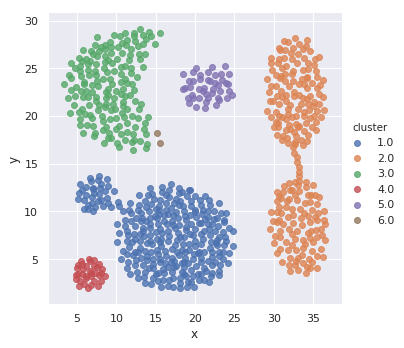

In [18]:
def k_clustering(k):
    
    G, ver, edges = bgraph.build_graph("in/data.txt")
    #edges = prim_clustering(G, k)
    edges = kruskal_clustering(G, edges, k)
    plot = pcluster(edges, ver)
    plot.show_clusters('cluster_kruskal')

    pclasses = plot.classes_list()
    tclasses = bgraph.read_classes('in/classes.txt')
    
    print(adjusted_rand_score(tclasses, pclasses))
    
k_clustering(6)

In [ ]:
def prim_clustering(G, k):
    
    pred = mst.prim_algorithm(G)
    
    k = k - 1
        
    keys = list(pred.keys())
    edges = []
            
    for i in range(len(keys)):
        edges.append([G[keys[i]][pred[i+1]-1], i+1, pred[i+1]])
                                
    edges = sorted(edges, reverse=True)
    
    for j in range(k):
        edges[j] = [0, j+1, j+1] 
    
    return edges